In [1]:
#pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets

data = pd.concat([X, y], axis=1)

In [3]:
duplicates = data.duplicated().any()
if duplicates:
    print("yes")
else:
    print("No")
    
data.drop_duplicates(inplace=True)

yes


In [4]:
# assign the incorrect values as null
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data.replace({'?': np.nan}, inplace=True)

In [5]:
missing_values = [var for var in data.columns if data[var].isnull().mean()>0
                 and data[var].dtypes == 'O']
missing_values

['workclass', 'occupation', 'native-country']

<Axes: xlabel='workclass'>

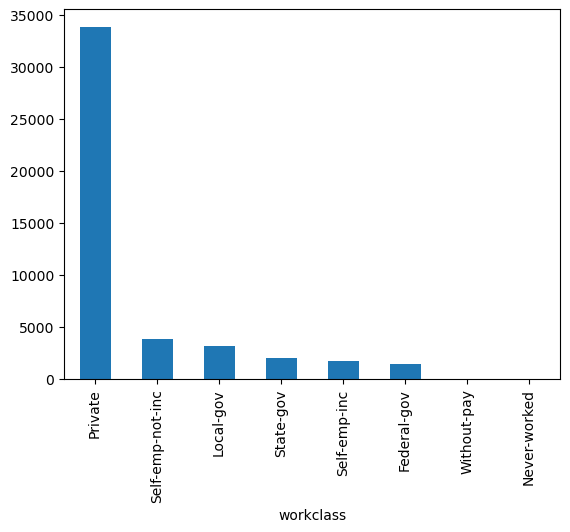

In [6]:
data['workclass'].value_counts().plot.bar()

<Axes: xlabel='workclass'>

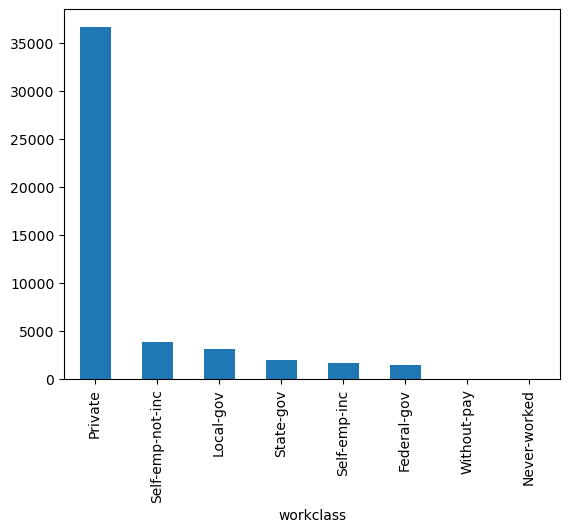

In [7]:
data['workclass'].fillna('Private', inplace=True)
data['workclass'].value_counts().plot.bar()

<Axes: xlabel='occupation'>

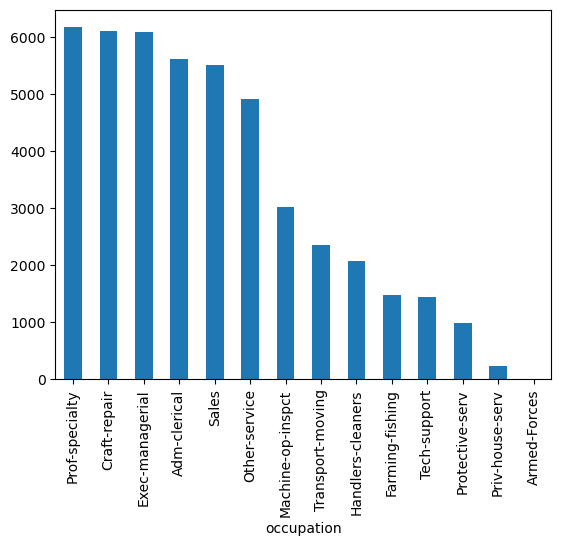

In [8]:
data['occupation'].value_counts().plot.bar()

<Axes: xlabel='occupation'>

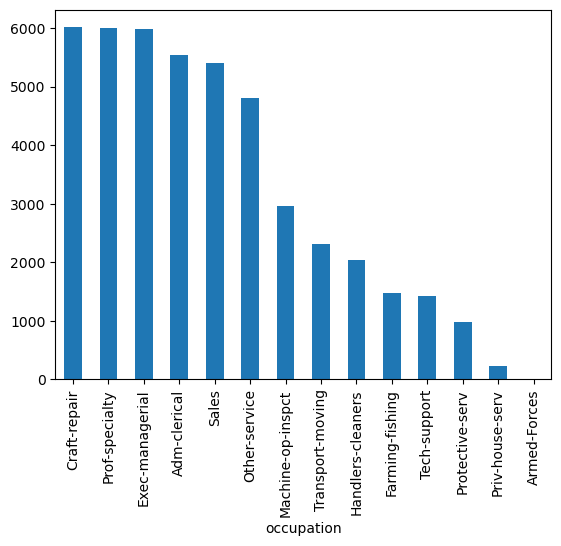

In [9]:
#data['occupation'].fillna('Prof-specialty', inplace=True)
data['occupation'] = data['occupation'].replace('?', np.nan)
data.dropna(how='any', inplace=True)
data['occupation'].value_counts().plot.bar()

<Axes: xlabel='native-country'>

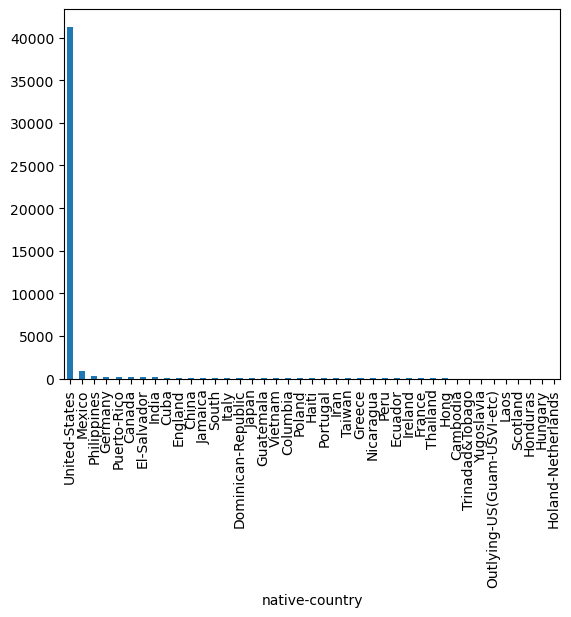

In [10]:
data['native-country'].value_counts().plot.bar()

<Axes: xlabel='native-country'>

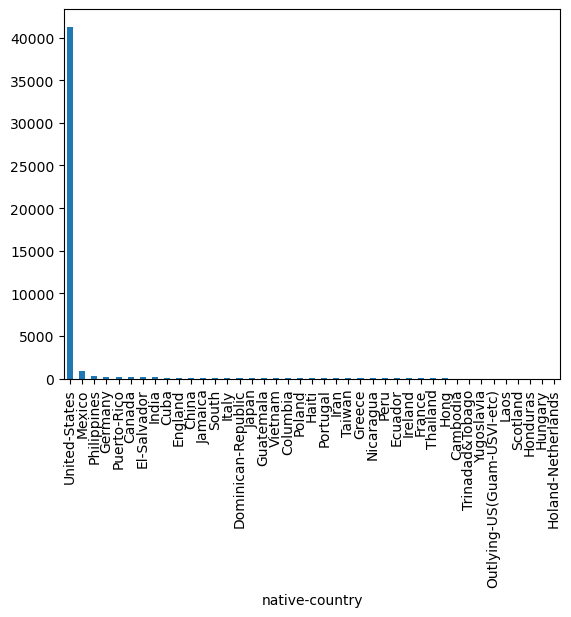

In [11]:
data['native-country'].fillna('United-States', inplace=True)
data['native-country'].value_counts().plot.bar()

In [12]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
grouped_data = data.groupby('education')['education-num'].describe()
print(grouped_data)

                count  mean  std   min   25%   50%   75%   max
education                                                     
10th           1223.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0
11th           1619.0   7.0  0.0   7.0   7.0   7.0   7.0   7.0
12th            576.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0
1st-4th         220.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0
5th-6th         448.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0
7th-8th         822.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0
9th             676.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0
Assoc-acdm     1507.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0
Assoc-voc      1958.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0
Bachelors      7565.0  13.0  0.0  13.0  13.0  13.0  13.0  13.0
Doctorate       544.0  16.0  0.0  16.0  16.0  16.0  16.0  16.0
HS-grad       14777.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0
Masters        2513.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0
Preschool        71.0   1.0  0.0   1.0   1.0   1.0   1.

In [14]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column)

workclass
education
marital-status
occupation
relationship
race
sex
native-country
income


In [15]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])
        
# Splitting data into features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Training
# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 3: Evaluation
# Predictions
nb_predictions = nb_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Evaluation metrics
nb_accuracy = accuracy_score(y_test, nb_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

nb_report = classification_report(y_test, nb_predictions)
rf_report = classification_report(y_test, rf_predictions)

# Print results
print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)

print("\nNaive Bayes Classification Report:\n", nb_report)
print("\nRandom Forest Classification Report:\n", rf_report)


Naive Bayes Classifier Accuracy: 0.5255006084743887
Random Forest Classifier Accuracy: 0.5335767230888373

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.95      0.69      4532
           1       0.50      0.00      0.00      2246
           2       0.44      0.29      0.35      1498
           3       0.18      0.01      0.03       763

    accuracy                           0.53      9039
   macro avg       0.41      0.31      0.27      9039
weighted avg       0.48      0.53      0.41      9039


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.81      0.69      4532
           1       0.29      0.11      0.16      2246
           2       0.48      0.55      0.52      1498
           3       0.20      0.08      0.11       763

    accuracy                           0.53      9039
   macro avg       0.39      0.39      0.37      9039
wei